# These examples are heavily influenced by the documentation of the packages and the work of Rob Story

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import dask as dask
dask.set_options(get=dask.async.get_sync)

In [2]:

tables = pd.read_html("http://www.basketball-reference.com/leagues/NBA_2015_games.html")
games = tables[0]
games.to_csv('data/games.csv', index=False)

ImportError: lxml not found, please install it

In [6]:
pd.read_csv('data/games.csv').head()

,Date,Start (ET),Unnamed: 2,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 7,Notes
0,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Tue, Oct 28, 2014",10:30 pm,Box Score,Houston Rockets,108,Los Angeles Lakers,90,NaN,NaN
2,"Tue, Oct 28, 2014",8:00 pm,Box Score,Orlando Magic,84,New Orleans Pelicans,101,NaN,NaN
3,"Tue, Oct 28, 2014",8:00 pm,Box Score,Dallas Mavericks,100,San Antonio Spurs,101,NaN,NaN
4,"Wed, Oct 29, 2014",7:30 pm,Box Score,Brooklyn Nets,105,Boston Celtics,121,NaN,NaN


# Application of the pipe operator. 
You'll see here a simple example of data munging with Pandas. Notice the . pipe operator it allows you to pipe together commands much like | in unix. 

In [3]:
column_names = ['date', '_', '_box', 'away_team', 'away_points', 'home_team',
                'home_points', 'n_ot', 'notes']
games = (pd.read_csv('data/games.csv', names=column_names, parse_dates=['date'],
                     skiprows=2)).drop(['_', '_box', 'notes', 'n_ot'], axis='columns').set_index('date', append=True)
games.index.names = ['game_id', 'date']
games.head()



,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,"Tue, Oct 28, 2014",Houston Rockets,108,Los Angeles Lakers,90
1,"Tue, Oct 28, 2014",Orlando Magic,84,New Orleans Pelicans,101
2,"Tue, Oct 28, 2014",Dallas Mavericks,100,San Antonio Spurs,101
3,"Wed, Oct 29, 2014",Brooklyn Nets,105,Boston Celtics,121
4,"Wed, Oct 29, 2014",Milwaukee Bucks,106,Charlotte Hornets,108


# Assign operator 
This creates a new dataframe (a copy) with all the old columns and the new one. 

In [4]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.randn(10)})

In [5]:
df.assign(ln_A_plus_1 = lambda x: np.log(x.A)+1)

,A,B,ln_A_plus_1
0,1,-0.858868,1.000000
1,2,0.109173,1.693147
2,3,0.698471,2.098612
3,4,0.685339,2.386294
4,5,0.214680,2.609438
5,6,-0.025697,2.791759
6,7,0.022288,2.945910
7,8,0.232748,3.079442
8,9,1.370830,3.197225
9,10,0.565031,3.302585


# I wanna count stuff using Toolz :) 
* PSA: It's got a really cool API well worth a read - add link here

In [6]:
import toolz as tz
accounts = [(1, 'Alice', 100, 'F'),(2, 'Bob', 200, 'M'),(3, 'Charlie', 150, 'M'),
            (4, 'Dennis', 50, 'M'),(5, 'Edith', 300, 'F'), (6, 'Alice', 150, 'F'), (7, 'Charlie', 350, 'M')]

* We can do things like compute frequencies. Let's look at the 2 column (python counts from 0) and the frequency of names

In [7]:
tz.frequencies([r[1] for r in accounts])

{'Alice': 2, 'Bob': 1, 'Charlie': 2, 'Dennis': 1, 'Edith': 1}

We want to reproduce 
```sql 
SELECT name, balance
FROM accounts
WHERE balance > 200``` 

In [8]:
# Toolz has currying!
import toolz.curried as tzc
tzc.pipe(accounts, 
         tzc.filter(lambda r: r[2] > 200),
         tzc.map(tzc.get([1,2])),dict)


{'Charlie': 350, 'Edith': 300}

# Xarray

In [9]:
import xarray as xray
import pymc3 as pm

In [10]:

arr = np.array([[1, 2, 3, 4], 
                [10, 20, 30, 40],
                [100, 200, 300, 400]])
dim0_coords = ['a', 'b', 'c']
dim1_coords = ['foo', 'bar', 'baz', 'qux']
da = xray.DataArray(arr, [('x', dim0_coords), ('y', dim1_coords)])
da

<xarray.DataArray (x: 3, y: 4)>
array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) <U3 'foo' 'bar' 'baz' 'qux'

In [11]:
da.values

array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])

In [13]:
da[0:3]

<xarray.DataArray (x: 3, y: 4)>
array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) <U3 'foo' 'bar' 'baz' 'qux'

In [16]:
da.dims

('x', 'y')

In [17]:
da.coords

Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) <U3 'foo' 'bar' 'baz' 'qux'

In [18]:

# Indexing!
da.loc['b']

<xarray.DataArray (y: 4)>
array([10, 20, 30, 40])
Coordinates:
    x        <U1 'b'
  * y        (y) <U3 'foo' 'bar' 'baz' 'qux'

In [21]:
# Get a mean by label
da.mean(dim='y')

<xarray.DataArray (x: 3)>
array([   2.5,   25. ,  250. ])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'

# Blaze
What is Blaze and why should I care?

# Dask 
What about Dask 


# Bayesian Logistic Regression
* It is outside of scope to explain in depth what all this means. But you can look at 
[Bayesian Logreg](https://pymc-devs.github.io/pymc3/Bayesian_LogReg/)

In [22]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=['age', 'workclass', 'fnlwgt', 
                'education-categorical', 'educ', 
                'marital-status', 'occupation',
                'relationship', 'race', 'sex', 
                'captial-gain', 'capital-loss', 
                'hours', 'native-country', 
                'income'])

In [23]:
def plot_traces(traces, retain=1000):
    ''' 
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:], figsize=(12,len(traces.varnames)*1.5),
        lines={k: v['mean'] for k, v in pm.df_summary(traces[-retain:]).iterrows()})

    for i, mn in enumerate(pm.df_summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [24]:
data = data[~pd.isnull(data['income'])]

In [25]:
data[data['native-country']==" United-States"]
income = 1 * (data['income'] == " >50K")
age2 = np.square(data['age'])
data = data[['age', 'educ', 'hours']]
data['age2'] = age2
data['income'] = income

In [26]:
with pm.Model() as logistic_model:
    pm.glm.glm('income ~ age + age2 + educ + hours', data, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(2000, pm.NUTS(), progressbar=True)

Applied logodds-transform to p and added transformed p_logodds to model.
 [-----------------100%-----------------] 2001 of 2000 complete in 618.9 sec

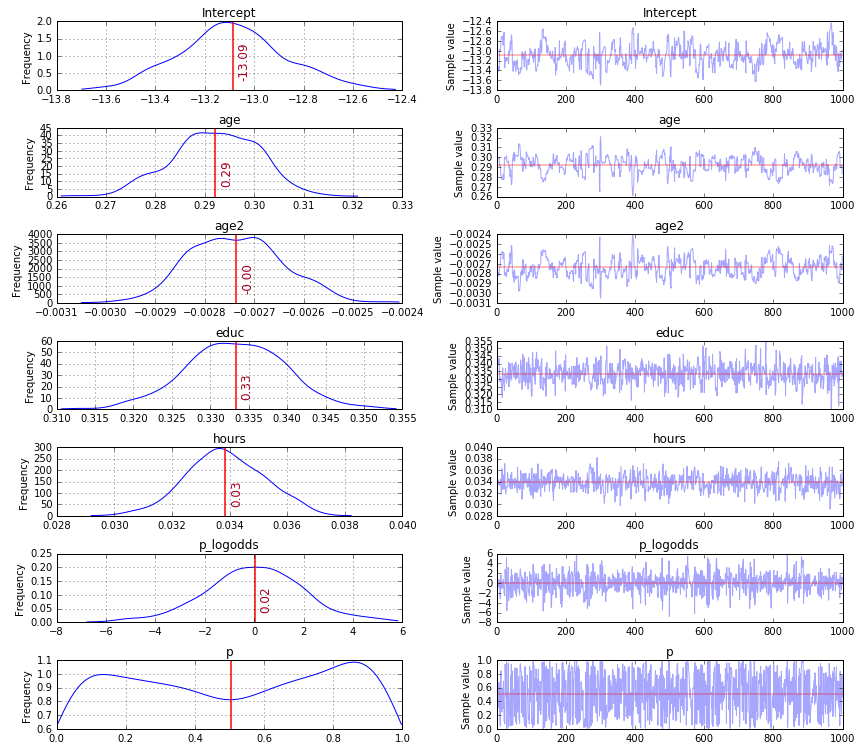

In [29]:
plot_traces(trace_logistic_model, retain=1000)